## Analysis of Doncic's stats for season 23/24

Last game from the stats was played on 3rd March

In [2]:
import pandas as pd

In [3]:
data = pd.read_csv("Luka Doncic_Season23_24_Stats.csv")

In [4]:
data.head()

,SEASON_ID,Player_ID,Game_ID,GAME_DATE,MATCHUP,WL,MIN,FGM,FGA,FG_PCT,...,DREB,REB,AST,STL,BLK,TOV,PF,PTS,PLUS_MINUS,VIDEO_AVAILABLE
0,22023,1629029,22300871,"MAR 03, 2024",DAL vs. PHI,L,40,14,27,0.519,...,9,11,10,1,0,7,2,38,9,1
1,22023,1629029,22300859,"MAR 01, 2024",DAL @ BOS,L,37,14,25,0.560,...,9,12,11,0,0,2,3,37,-20,1
2,22023,1629029,22300844,"FEB 28, 2024",DAL @ TOR,W,36,11,23,0.478,...,11,12,16,2,0,5,3,30,11,1
3,22023,1629029,22300832,"FEB 27, 2024",DAL @ CLE,L,41,17,29,0.586,...,9,9,14,3,0,1,1,45,13,1
4,22023,1629029,22300819,"FEB 25, 2024",DAL @ IND,L,33,10,21,0.476,...,5,6,6,1,2,3,4,33,-13,1


In [5]:
attributes_of_intereset = ["MATCHUP", "WL", "MIN", "FGM", "FGA", "FG_PCT", "FG3M", "FG3A", "FG3_PCT",
                            "FTM", "FTA", "FT_PCT", "OREB", "DREB", "REB", "AST", "STL", "BLK", "TOV",
                            "PF", "PTS", "PLUS_MINUS"]

In [6]:
attributes_stats = ["MIN", "FGM", "FGA", "FG_PCT", "FG3M", "FG3A", "FG3_PCT",
                    "FTM", "FTA", "FT_PCT", "OREB", "DREB", "REB", "AST", "STL", "BLK", "TOV",
                    "PF", "PTS", "PLUS_MINUS"]

In [7]:
data_interest = data.loc[:, attributes_of_intereset]

In [8]:
data_stats = data.loc[:, attributes_stats]

In [11]:
data_stats.head()

,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS,PLUS_MINUS
0,40,14,27,0.519,4,10,0.400,6,6,1.000,2,9,11,10,1,0,7,2,38,9
1,37,14,25,0.560,3,9,0.333,6,8,0.750,3,9,12,11,0,0,2,3,37,-20
2,36,11,23,0.478,1,8,0.125,7,9,0.778,1,11,12,16,2,0,5,3,30,11
3,41,17,29,0.586,6,11,0.545,5,5,1.000,0,9,9,14,3,0,1,1,45,13
4,33,10,21,0.476,4,8,0.500,9,12,0.750,1,5,6,6,1,2,3,4,33,-13


In [12]:
data_stats["FG2M"] = data_stats["FGM"] - data_stats["FG3M"]
data_stats["FG2A"] = data_stats["FGA"] - data_stats["FG3A"]

In [13]:
data_stats["FG2_PCT"] = data_stats["FG2M"] / data_stats["FG2A"]

In [14]:
fg2m = data_stats.pop("FG2M")
fg2a = data_stats.pop("FG2A")
fg2pct = data_stats.pop("FG2_PCT")

In [15]:
data_stats.insert(4, "FG2M", fg2m)
data_stats.insert(5, "FG2A", fg2a)
data_stats.insert(6, "FG2_PCT", fg2pct)

In [16]:
data_stats["FG2_PCT"] = data_stats["FG2_PCT"].map('{:.3f}'.format)

In [17]:
data_stats["FG2_PCT"] = pd.to_numeric(data_stats["FG2_PCT"], errors='coerce')

In [18]:
type(data_stats["FG2_PCT"][0])

numpy.float64

In [19]:
data_stats.head()

,MIN,FGM,FGA,FG_PCT,FG2M,FG2A,FG2_PCT,FG3M,FG3A,FG3_PCT,...,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS,PLUS_MINUS
0,40,14,27,0.519,10,17,0.588,4,10,0.400,...,2,9,11,10,1,0,7,2,38,9
1,37,14,25,0.560,11,16,0.688,3,9,0.333,...,3,9,12,11,0,0,2,3,37,-20
2,36,11,23,0.478,10,15,0.667,1,8,0.125,...,1,11,12,16,2,0,5,3,30,11
3,41,17,29,0.586,11,18,0.611,6,11,0.545,...,0,9,9,14,3,0,1,1,45,13
4,33,10,21,0.476,6,13,0.462,4,8,0.500,...,1,5,6,6,1,2,3,4,33,-13


In [20]:
column_averages = data_stats.mean().round(3)

In [21]:
column_averages

MIN           37.434
FGM           11.736
FGA           23.660
FG_PCT         0.493
FG2M           7.868
FG2A          13.472
FG2_PCT        0.582
FG3M           3.868
FG3A          10.189
FG3_PCT        0.373
FTM            7.189
FTA            9.170
FT_PCT         0.792
OREB           0.792
DREB           8.151
REB            8.943
AST            9.736
STL            1.472
BLK            0.585
TOV            3.906
PF             2.075
PTS           34.528
PLUS_MINUS     2.623
dtype: float64

In [22]:
data_avg = pd.DataFrame(column_averages)

In [23]:
data_avg

,0
MIN,37.434
FGM,11.736
FGA,23.660
FG_PCT,0.493
FG2M,7.868
FG2A,13.472
FG2_PCT,0.582
FG3M,3.868
FG3A,10.189
FG3_PCT,0.373


In [32]:
data["OPPONENT"] = data["MATCHUP"].apply(lambda x: x.split()[-1])

In [33]:
opponent = data.pop("OPPONENT")

In [34]:
data.insert(5, "OPPONENT", opponent)

In [35]:
data["HOME"] = data["MATCHUP"].apply(lambda x: 1 if 'vs.' in x else 0)

In [36]:
home = data.pop("HOME")

In [37]:
data.insert(4, "HOME", home)

In [38]:
data.head()

,SEASON_ID,Player_ID,Game_ID,GAME_DATE,HOME,OPPONENT,MATCHUP,WL,MIN,FGM,...,DREB,REB,AST,STL,BLK,TOV,PF,PTS,PLUS_MINUS,VIDEO_AVAILABLE
0,22023,1629029,22300871,"MAR 03, 2024",1,PHI,DAL vs. PHI,L,40,14,...,9,11,10,1,0,7,2,38,9,1
1,22023,1629029,22300859,"MAR 01, 2024",0,BOS,DAL @ BOS,L,37,14,...,9,12,11,0,0,2,3,37,-20,1
2,22023,1629029,22300844,"FEB 28, 2024",0,TOR,DAL @ TOR,W,36,11,...,11,12,16,2,0,5,3,30,11,1
3,22023,1629029,22300832,"FEB 27, 2024",0,CLE,DAL @ CLE,L,41,17,...,9,9,14,3,0,1,1,45,13,1
4,22023,1629029,22300819,"FEB 25, 2024",0,IND,DAL @ IND,L,33,10,...,5,6,6,1,2,3,4,33,-13,1


In [40]:
data["GAME_DATE"] = pd.to_datetime(data["GAME_DATE"])

C:\Users\alpesh\AppData\Local\Temp\ipykernel_9528\3065780448.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data["GAME_DATE"] = pd.to_datetime(data["GAME_DATE"])


In [41]:
type(data["GAME_DATE"][0])

pandas._libs.tslibs.timestamps.Timestamp

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
data.shape

(53, 29)

In [44]:
data.columns

Index(['SEASON_ID', 'Player_ID', 'Game_ID', 'GAME_DATE', 'HOME', 'OPPONENT',
       'MATCHUP', 'WL', 'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A',
       'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'STL',
       'BLK', 'TOV', 'PF', 'PTS', 'PLUS_MINUS', 'VIDEO_AVAILABLE'],
      dtype='object')

In [45]:
%matplotlib inline

<Axes: title={'center': "Doncic's +/- through the games"}, xlabel='GAME_DATE', ylabel='PLUS_MINUS'>

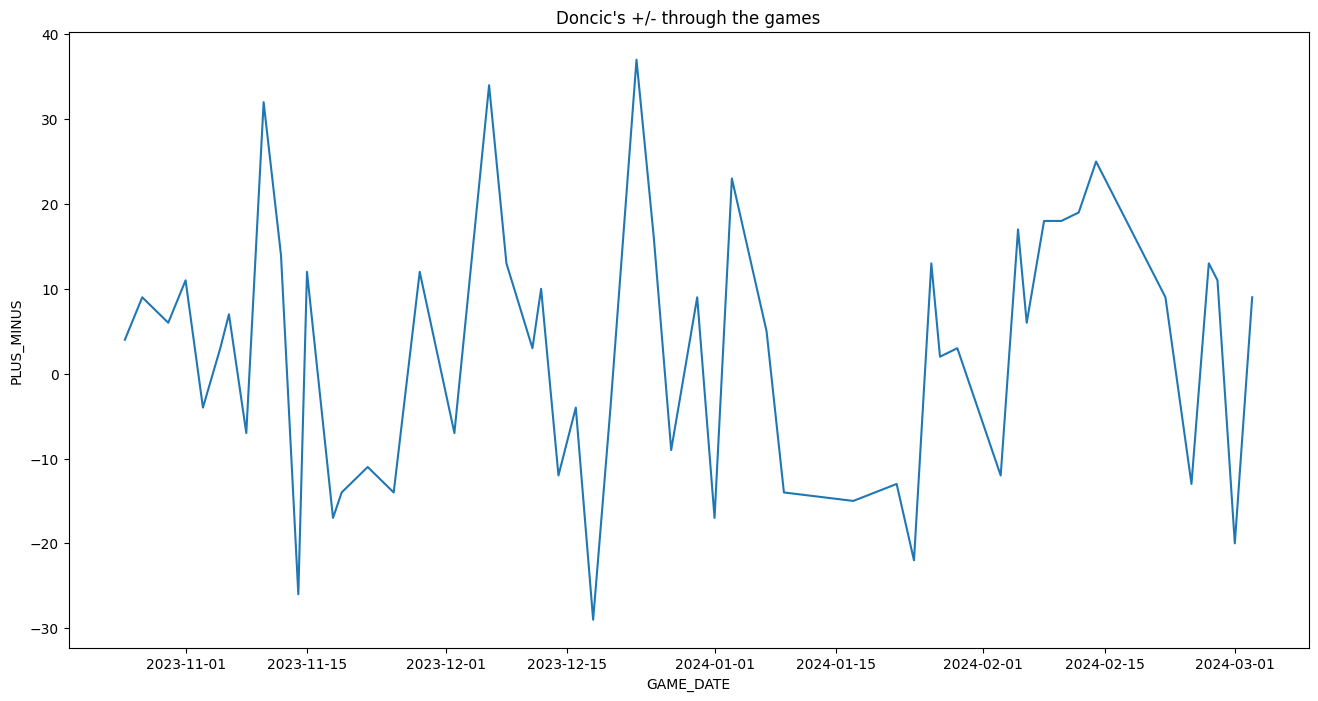

In [46]:
plt.figure(figsize=(16, 8))
plt.title("Doncic's +/- through the games")
sns.lineplot(data=data, x="GAME_DATE", y="PLUS_MINUS")

Text(0.5, 0, 'GAME_DATE')

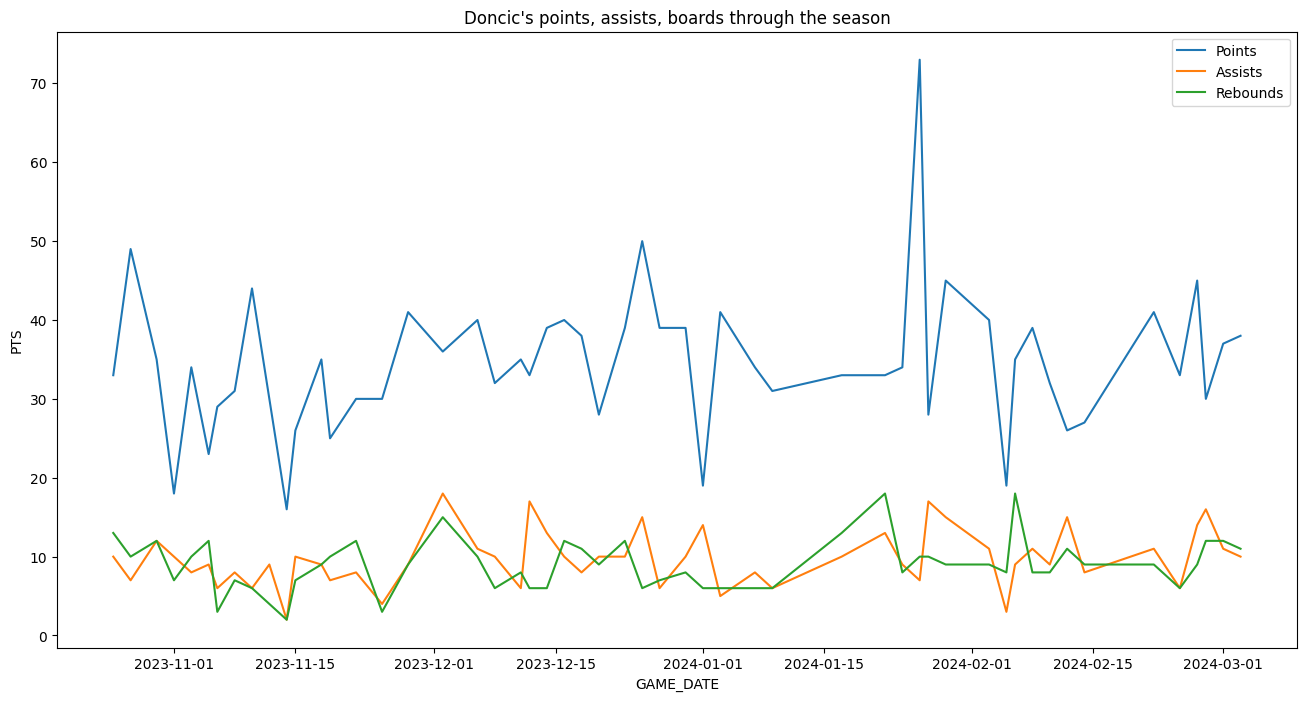

In [47]:
plt.figure(figsize=(16, 8))
plt.title("Doncic's points, assists, boards through the season")
sns.lineplot(data=data, x="GAME_DATE", y="PTS", label="Points")
sns.lineplot(data=data, x="GAME_DATE", y="AST", label="Assists")
sns.lineplot(data=data, x="GAME_DATE", y="REB", label="Rebounds")
plt.xlabel("GAME_DATE")

Text(0.5, 0, 'Opponents')

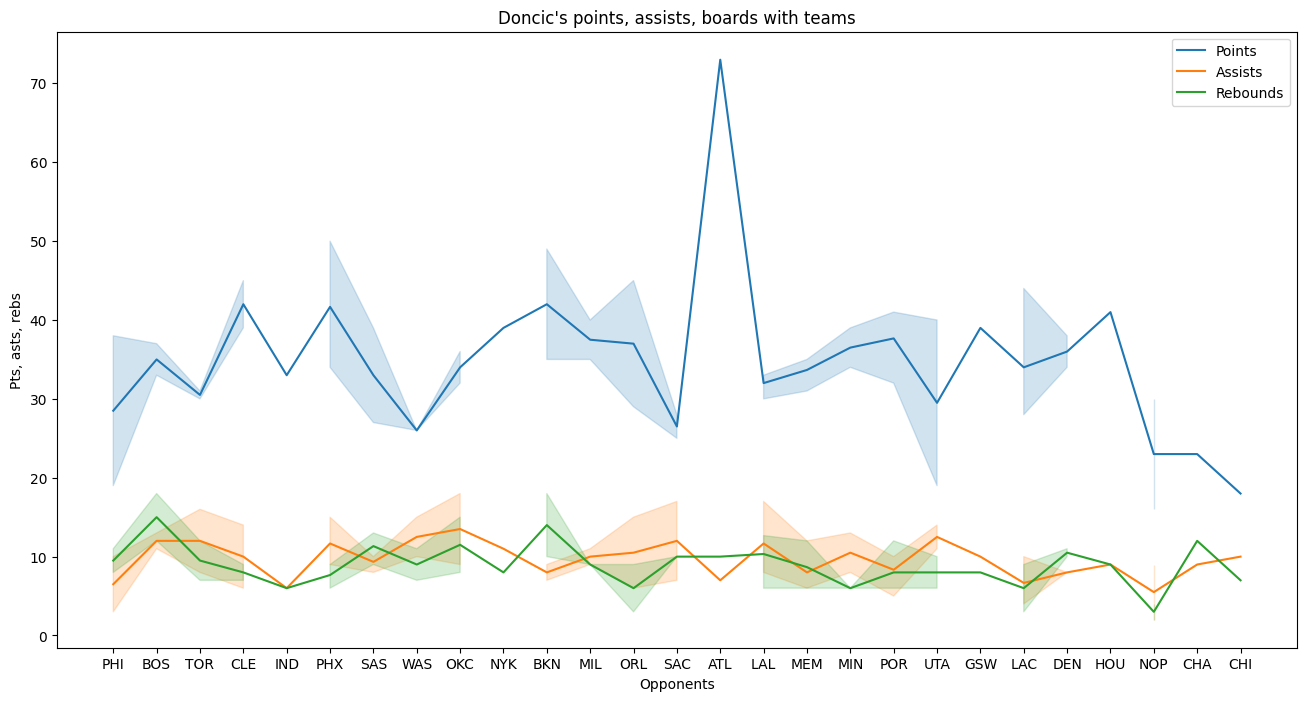

In [48]:
plt.figure(figsize=(16, 8))
plt.title("Doncic's points, assists, boards with teams")
sns.lineplot(data=data, x="OPPONENT", y="PTS", label="Points")
sns.lineplot(data=data, x="OPPONENT", y="AST", label="Assists")
sns.lineplot(data=data, x="OPPONENT", y="REB", label="Rebounds")
plt.ylabel("Pts, asts, rebs")
plt.xlabel("Opponents")

Text(0, 0.5, 'Field goal percentage')

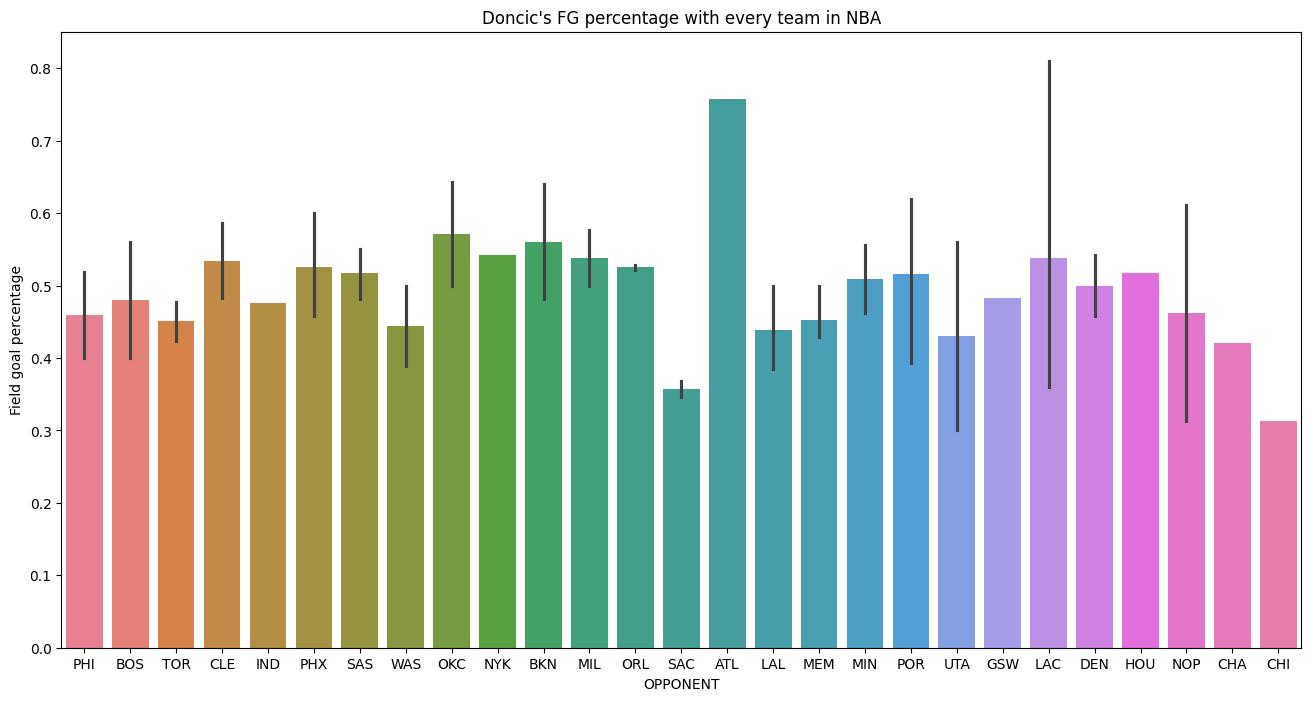

In [49]:
plt.figure(figsize=(16, 8))
plt.title("Doncic's FG percentage with every team in NBA")
sns.barplot(data=data, x="OPPONENT", y="FG_PCT", hue="OPPONENT")
plt.ylabel("Field goal percentage")

Text(0, 0.5, 'Field goal attempts')

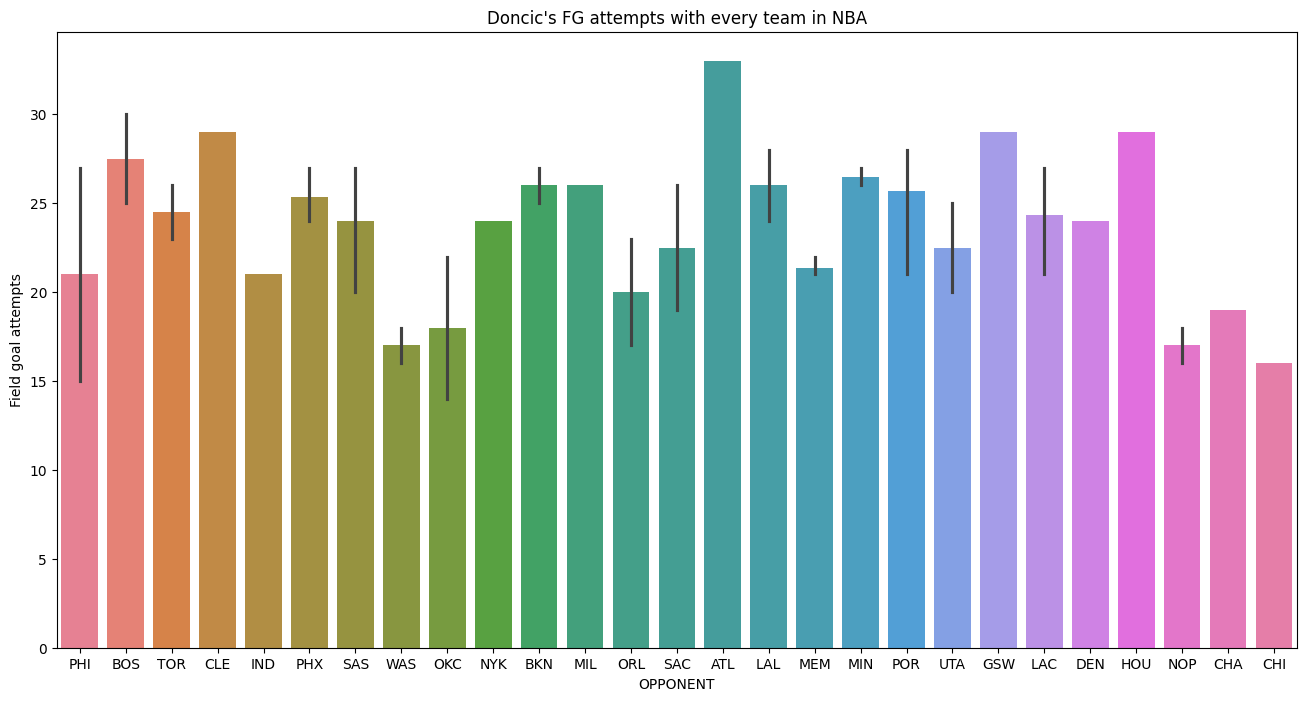

In [50]:
plt.figure(figsize=(16, 8))
plt.title("Doncic's FG attempts with every team in NBA")
sns.barplot(data=data, x="OPPONENT", y="FGA", hue="OPPONENT")
plt.ylabel("Field goal attempts")

In [53]:
import numpy as np

Text(0, 0.5, 'Turnovers')

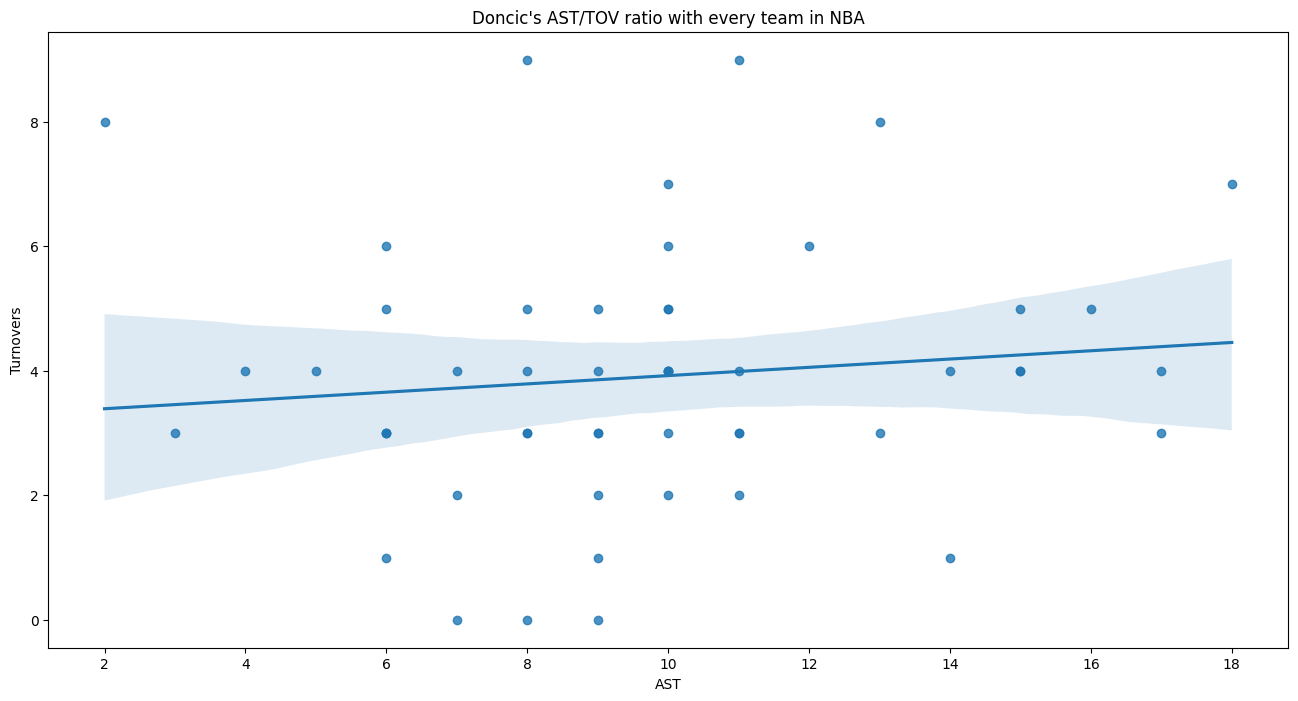

In [56]:
plt.figure(figsize=(16, 8))
plt.title("Doncic's AST/TOV ratio with every team in NBA")
sns.regplot(data=data, x="AST", y="TOV")
plt.ylabel("Turnovers")

Text(0, 0.5, 'Minutes')

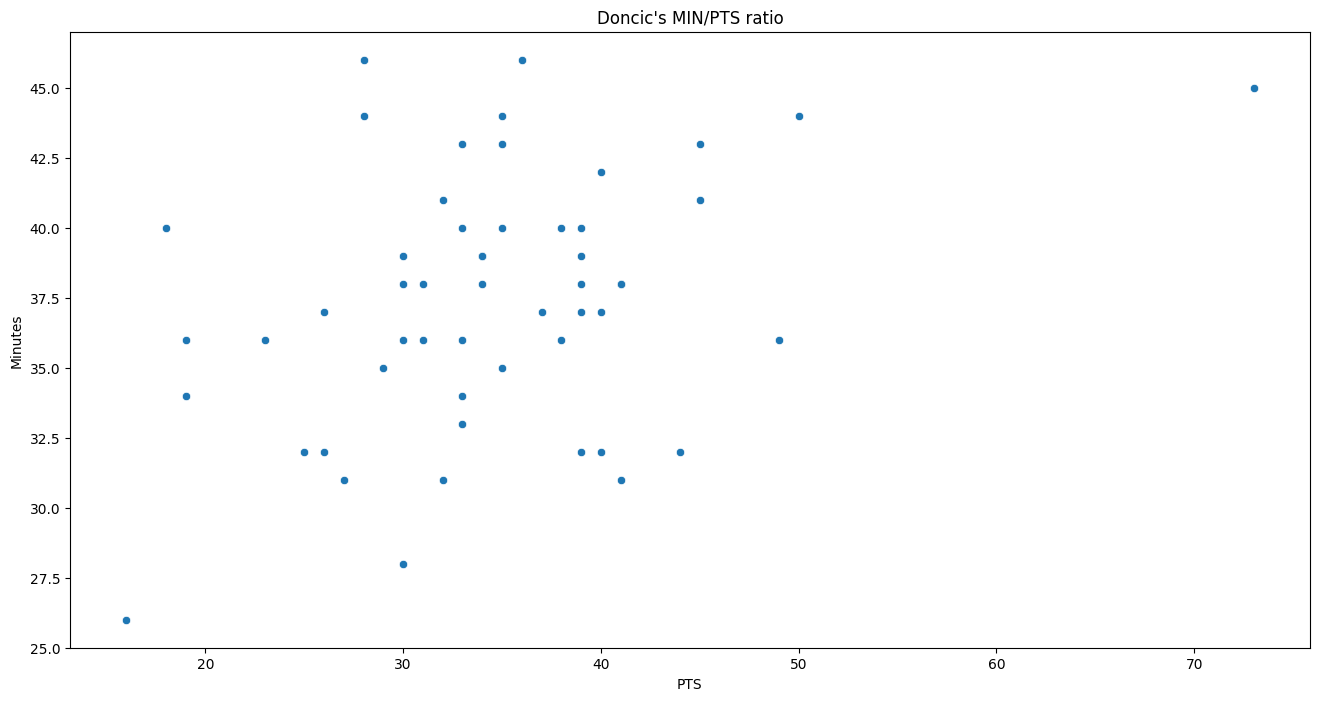

In [58]:
plt.figure(figsize=(16, 8))
plt.title("Doncic's MIN/PTS ratio")
sns.scatterplot(data=data, x="PTS", y="MIN")
plt.ylabel("Minutes")

Text(0, 0.5, 'Points')

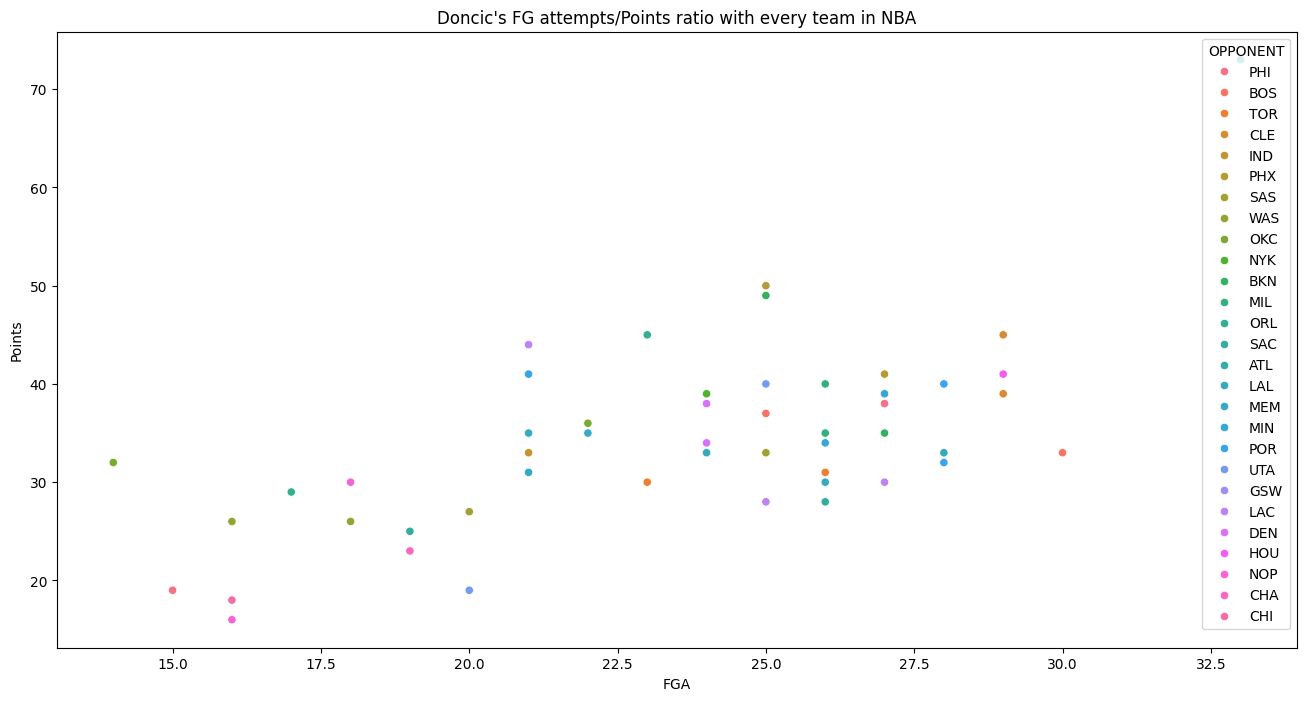

In [59]:
plt.figure(figsize=(16, 8))
plt.title("Doncic's FG attempts/Points ratio with every team in NBA")
sns.scatterplot(data=data, x="FGA", y="PTS", hue="OPPONENT")
plt.ylabel("Points")

Text(0, 0.5, 'Points')

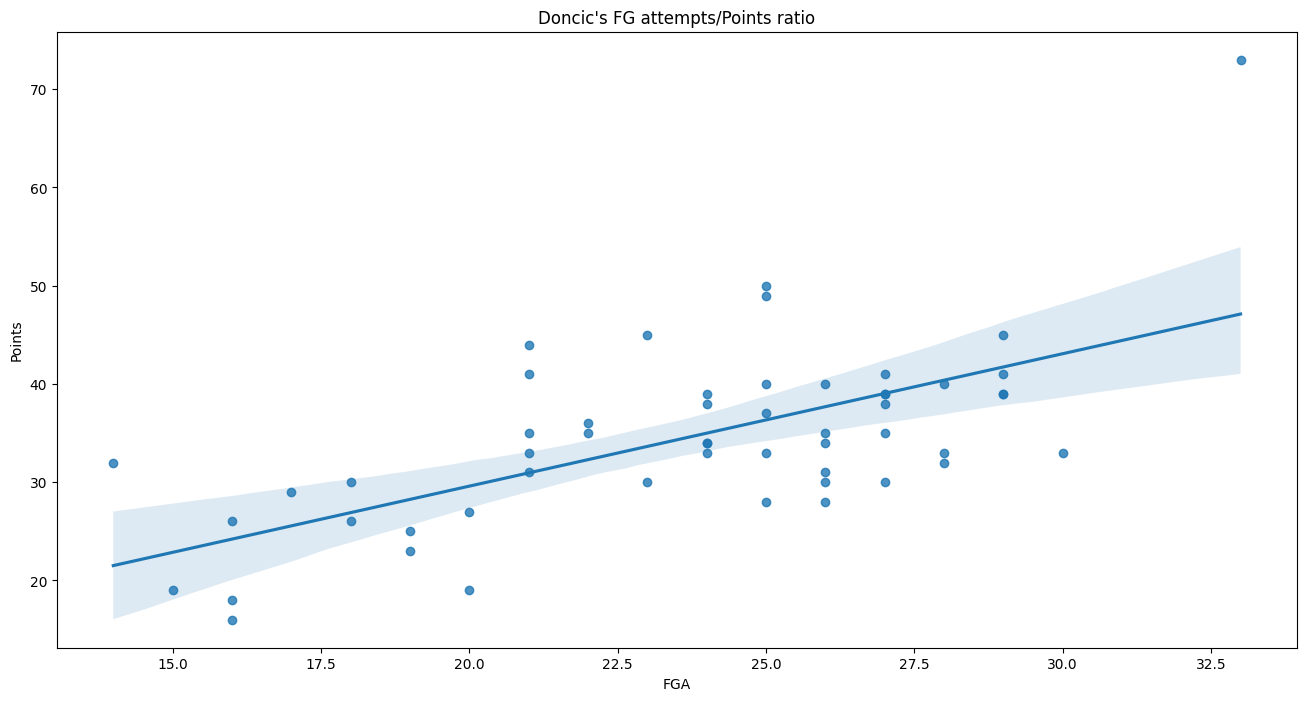

In [60]:
plt.figure(figsize=(16, 8))
plt.title("Doncic's FG attempts/Points ratio")
sns.regplot(data=data, x="FGA", y="PTS")
plt.ylabel("Points")

Text(0, 0.5, 'Free Throw Attempts')

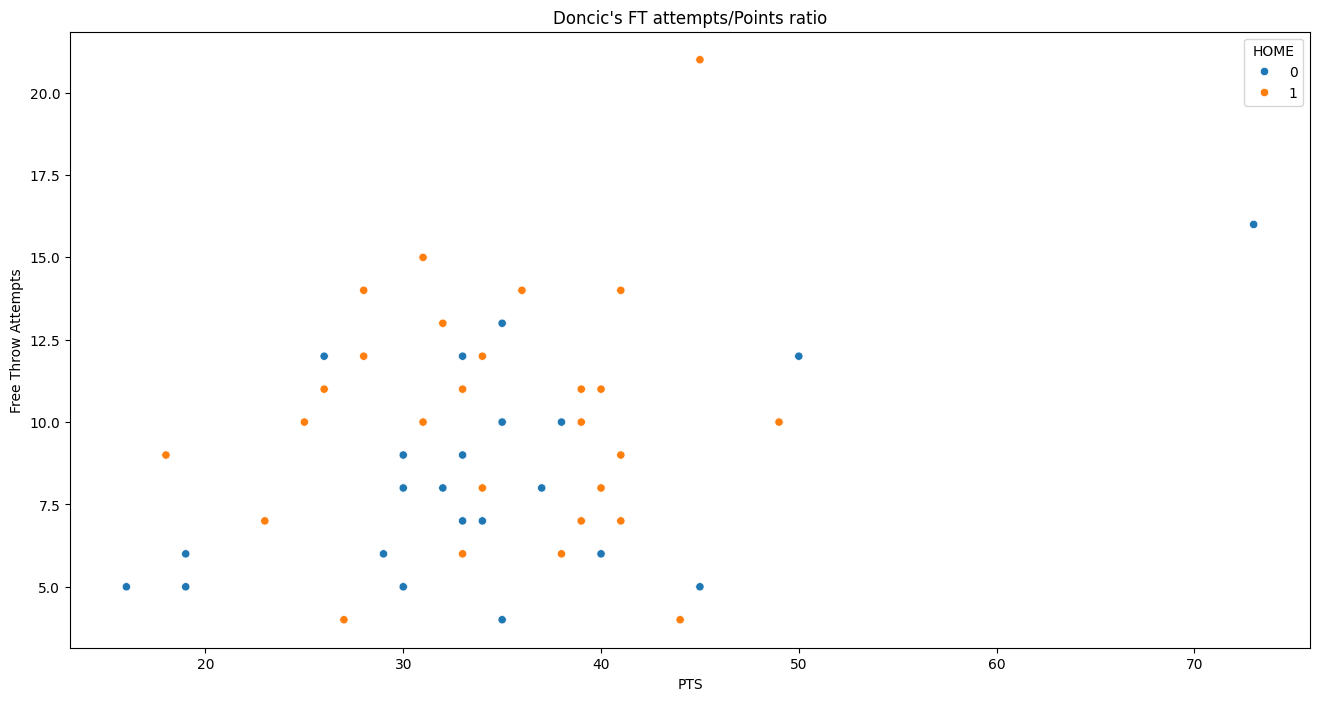

In [61]:
plt.figure(figsize=(16, 8))
plt.title("Doncic's FT attempts/Points ratio")
sns.scatterplot(data=data, x="PTS", y="FTA", hue="HOME")
plt.ylabel("Free Throw Attempts")

<Axes: xlabel='GAME_DATE', ylabel='PTS'>

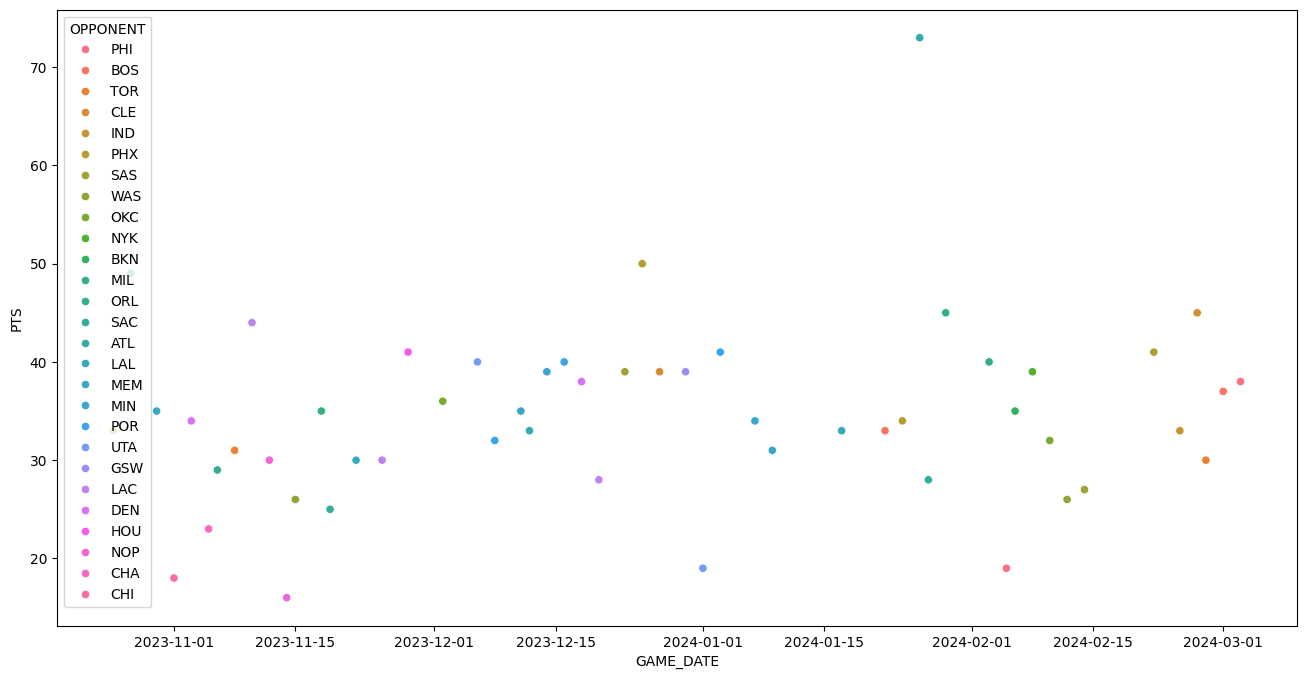

In [62]:
plt.figure(figsize=(16, 8))
sns.scatterplot(data=data, x="GAME_DATE", y="PTS", hue="OPPONENT")

Text(0, 0.5, 'Number of games')

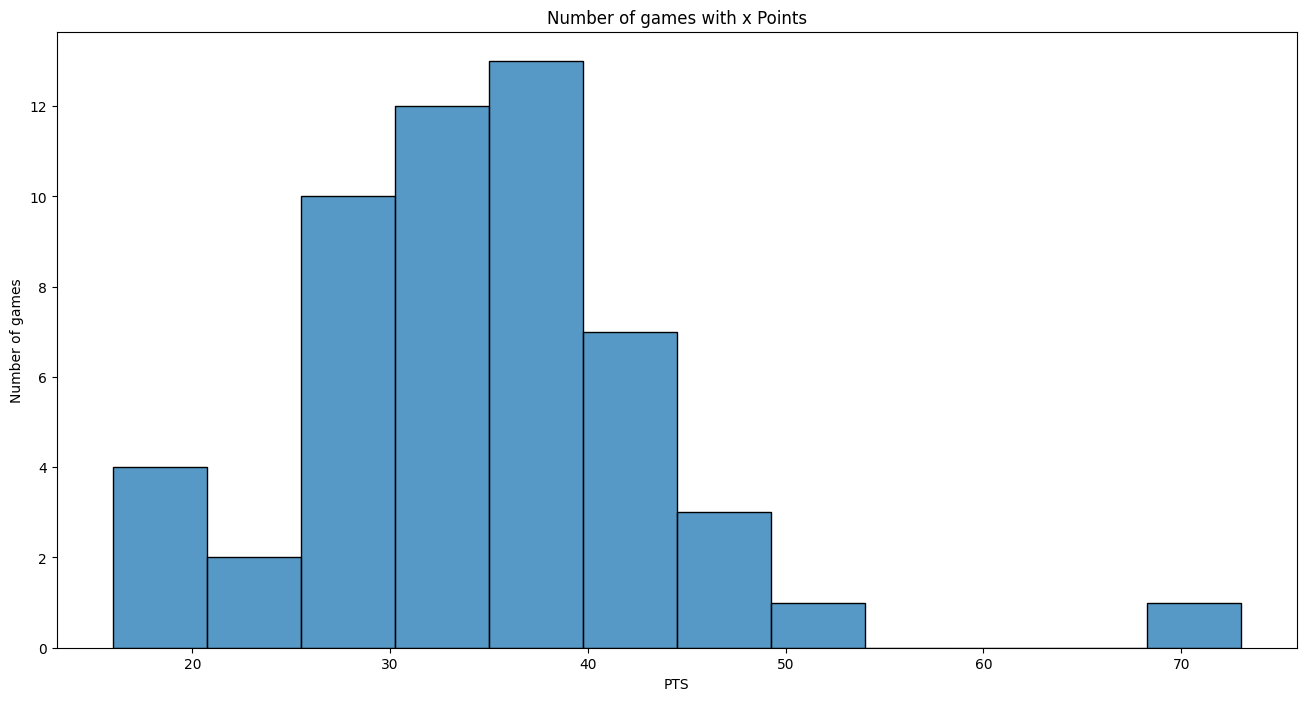

In [63]:
plt.figure(figsize=(16, 8))
plt.title("Number of games with x Points")
sns.histplot(data=data["PTS"])
plt.ylabel("Number of games")


Text(0, 0.5, 'Number of games')

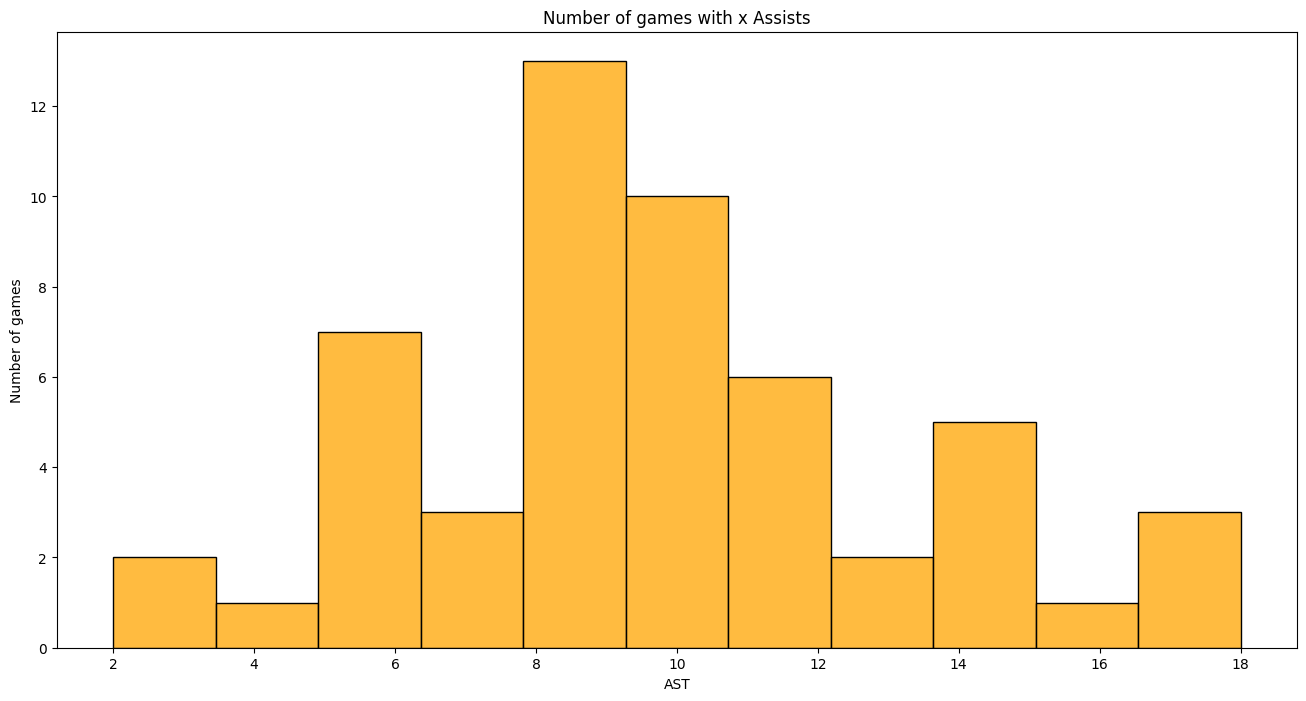

In [64]:
plt.figure(figsize=(16, 8))
plt.title("Number of games with x Assists")
sns.histplot(data=data["AST"], color='orange')
plt.ylabel("Number of games")

Text(0, 0.5, 'Number of games')

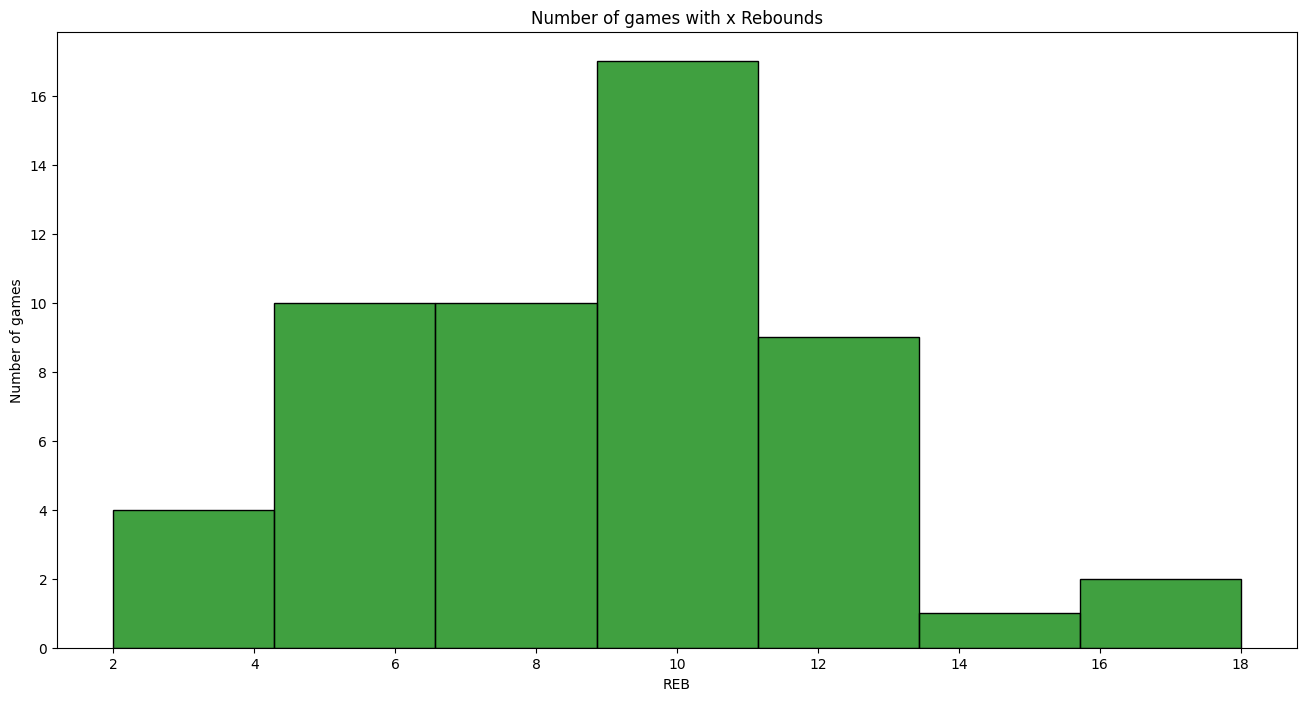

In [65]:
plt.figure(figsize=(16, 8))
plt.title("Number of games with x Rebounds")
sns.histplot(data=data["REB"], color='green')
plt.ylabel("Number of games")

Text(0, 0.5, 'Number of games')

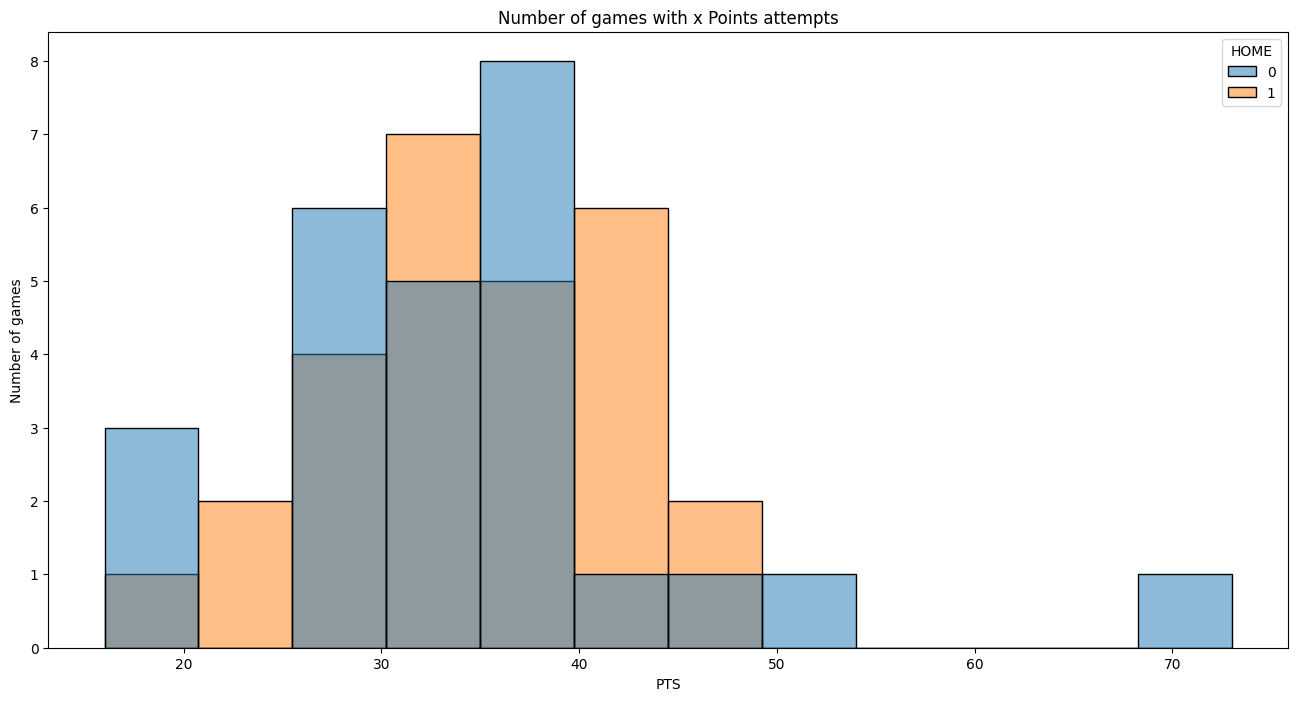

In [69]:
plt.figure(figsize=(16, 8))
plt.title("Number of games with x Points attempts")
sns.histplot(data=data, x="PTS", hue="HOME")
plt.ylabel("Number of games")

Text(0, 0.5, 'Number of games')

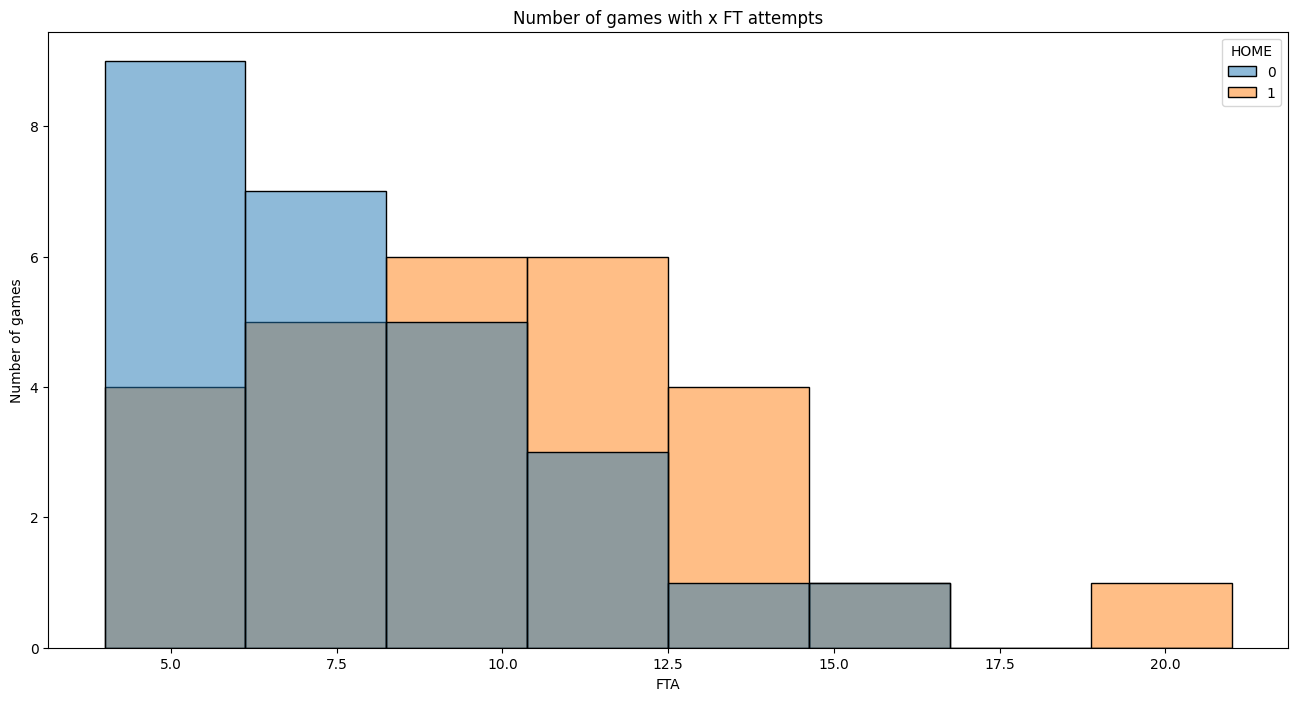

In [70]:
plt.figure(figsize=(16, 8))
plt.title("Number of games with x FT attempts")
sns.histplot(data=data, x="FTA", hue="HOME")
plt.ylabel("Number of games")

Text(0, 0.5, 'Number of games')

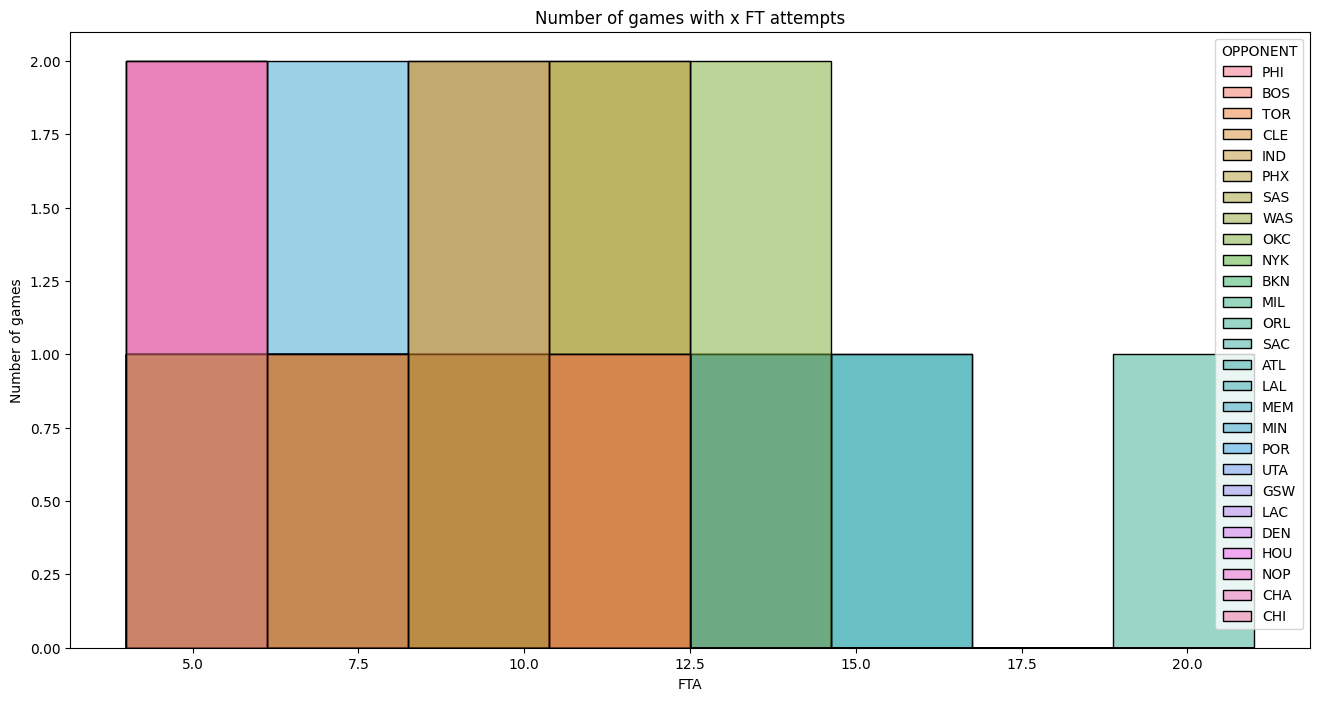

In [71]:
plt.figure(figsize=(16, 8))
plt.title("Number of games with x FT attempts")
sns.histplot(data=data, x="FTA", hue="OPPONENT")
plt.ylabel("Number of games")

Text(0.5, 1.0, 'Distribution of Offensive Rebounds, by home or away games')

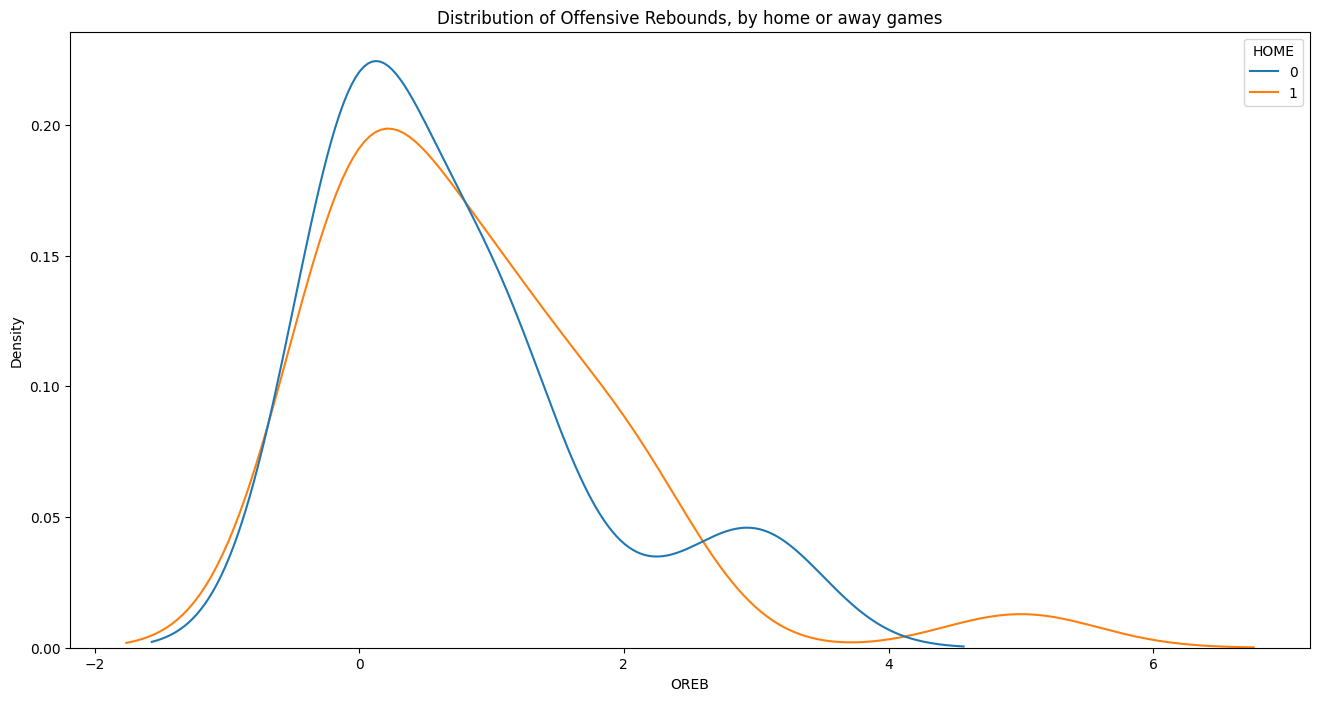

In [72]:
plt.figure(figsize=(16, 8))

sns.kdeplot(data=data, x="OREB", hue="HOME")

# Add title
plt.title("Distribution of Offensive Rebounds, by home or away games")

Text(0.5, 1.0, 'Distribution of Defensive Rebounds, by home or away games')

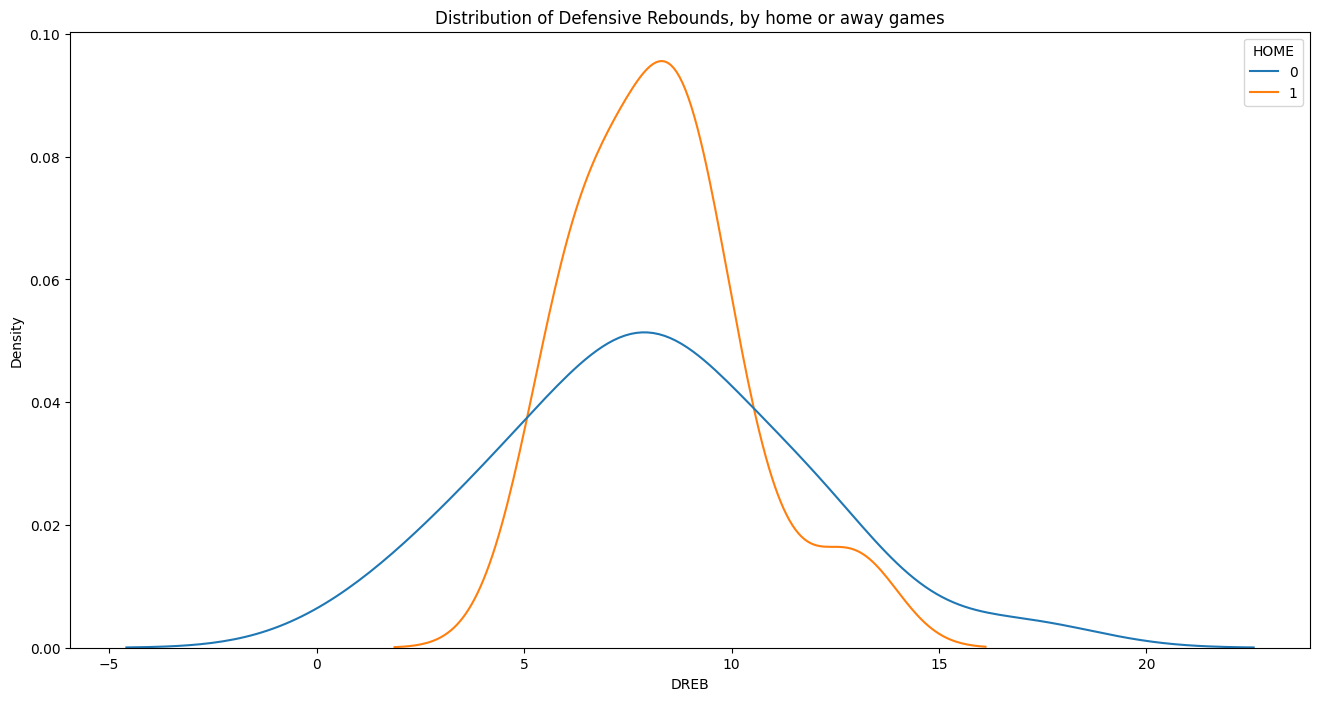

In [73]:
plt.figure(figsize=(16, 8))

sns.kdeplot(data=data, x="DREB", hue="HOME")

# Add title
plt.title("Distribution of Defensive Rebounds, by home or away games")